### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [235]:
data = pd.read_csv('data/coupons.csv')

In [236]:
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [237]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [238]:
# So far the data looks pretty well formatted but lets see if we have any NaNs in the set.
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [239]:
# Lets get a sense of the non-null data in the Cars column.
data[data['car'].notnull()]['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

### Data Cleaning Approach
It appears that the `car` column is almost fully NaN. We can't throw away that much data, and furthermore the car type doesn't need to be part of our analysis. I opted to remove the column completely.

I also notice that in the five questions regarding how frequently the person visits the different venue types there are some NaNs. Instead of dropping these rows I decided to treat the NaNs as 'never'.

In [240]:
data['Bar'].fillna("never", inplace = True)
data['CoffeeHouse'].fillna("never", inplace = True)
data['CarryAway'].fillna("never", inplace = True)
data['RestaurantLessThan20'].fillna("never", inplace = True)
data['Restaurant20To50'].fillna("never", inplace = True)

data.drop("car", axis = 1, inplace = True)

In [241]:
# Data should be clear of NaN now.
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [242]:
total = data['Y'].count()
reject = data[data['Y'] == 0]['Y'].count()
accept = data[data['Y'] == 1]['Y'].count()
acceptRate = data['Y'].mean()

print(f"Accept Offer: {accept}")
print(f"Reject Offer: {reject}")
print(f"Total Offer: {total}")

print(f"Accept Rate: {acceptRate * 100 :.2f}%")

Accept Offer: 7210
Reject Offer: 5474
Total Offer: 12684
Accept Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

In [243]:
fig = px.bar(x=['Accept Offer','Reject Offer'], y=data['Y'].value_counts(), labels={'y':'Count', 'x':'Choice'}, color_discrete_sequence=px.colors.qualitative.D3, color=['Accept Offer','Reject Offer'])
fig.update_layout(title={'text':'Accept or Reject Coupon'}, legend_title="Choice")

fig.show()

6. Use a histogram to visualize the temperature column.

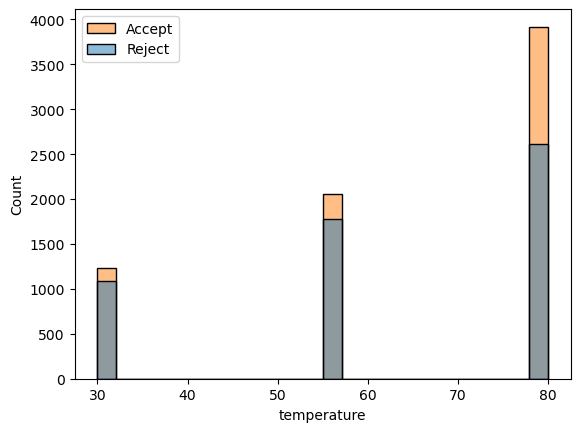

In [244]:
sns.histplot(data, x='temperature', hue='Y')
plt.legend(labels=["Accept","Reject"])
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  


### Question 1
Create a new `DataFrame` that contains just the bar coupons.


In [245]:
bardf = data[data['coupon'] == "Bar"]

### Question 2
What proportion of bar coupons were accepted?


In [246]:
accept_pct = bardf["Y"].mean()
print(f"Portion accepting the bar coupon {accept_pct * 100:.2f}%")

Portion accepting the bar coupon 41.00%


### Question 3
Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [247]:
# print(bardf['Bar'].value_counts())
less_than_4 = ['never', 'less1', '1~3']
more_than_4 = ['4~8', 'gt8']

question1 = bardf.query('Bar in @less_than_4')["Y"].mean()
question2 = bardf.query('Bar in @more_than_4')["Y"].mean()

print(f"Acceptance rate, 3 or fewer times a month: {question1 * 100:.2f}%")
print(f"Acceptance rate, 4 or more times a month: {question2 * 100:.2f}%\n")
print(f"Acceptance rate, grouped by frequency: \n{bardf.groupby('Bar')['Y'].mean().sort_values()}")


Acceptance rate, 3 or fewer times a month: 37.07%
Acceptance rate, 4 or more times a month: 76.88%

Acceptance rate, grouped by frequency: 
Bar
never    0.192714
less1    0.443860
1~3      0.647355
gt8      0.734694
4~8      0.780000
Name: Y, dtype: float64


### Question 4
Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [248]:
# print(bardf['age'].value_counts())
age_over_25 = ['26', '31', '36', '41', '46', '50plus']
more_than_1 = ['1~3', '4~8', 'gt8']

question3 = bardf.query('age in @age_over_25 & Bar in @more_than_1')["Y"].mean()
question3_1 = bardf.query('age not in @age_over_25 & Bar in @more_than_1')["Y"].mean()
question4 = bardf.query('not (age in @age_over_25 & Bar in @more_than_1)')["Y"].mean()

print(f"Acceptance rate, bar more than once a month and over 25: {question3 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month and not over 25: {question3_1 * 100:.2f}%")
print(f"Acceptance rate, bar NOT more than once a month or NOT over 25: {question4 * 100:.2f}%")

Acceptance rate, bar more than once a month and over 25: 69.52%
Acceptance rate, bar more than once a month and not over 25: 67.05%
Acceptance rate, bar NOT more than once a month or NOT over 25: 33.50%


### Answer 4
It appears that age doesn't have much affect on coupon acceptance. Frequency of visit is the most impactful feature.

### Question 5
Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [249]:
# print(bardf['passanger'].value_counts())
passenger_not_kid = ['Friends', 'Partner']
occupation_FFF = ['Farming Fishing & Forestry']

question5 = bardf.query('Bar in @more_than_1 & passanger in @passenger_not_kid & occupation not in @occupation_FFF')["Y"].mean()
question5_1 = bardf.query('not( Bar in @more_than_1 & passanger in @passenger_not_kid & occupation not in @occupation_FFF)')["Y"].mean()
question6 = bardf.query('Bar in @more_than_1 & passanger in @passenger_not_kid')["Y"].mean()
question7 = bardf.query('Bar in @more_than_1 & passanger == "Alone"')["Y"].mean()
question8 = bardf.query('Bar in @more_than_1 & passanger == "Friend(s)"')["Y"].mean()
question9 = bardf.query('Bar in @more_than_1 & passanger == "Partner"')["Y"].mean()
question9_1 = bardf.query('Bar in @more_than_1 & passanger == "Kid(s)"')["Y"].mean()

print(f"Acceptance rate, bar more than once a month, non-kid passenger, not in occupation FFF: {question5 * 100:.2f}%")
print(f"Acceptance rate, not (bar more than once a month, non-kid passenger, not in occupation FFF): {question5_1 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, non-kid passenger: {question6 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, riding alone: {question7 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, riding with friends: {question8 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, riding with partner: {question9 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, riding with kid(s): {question9_1 * 100:.2f}%\n")

print(f"For those with non-kid passengers and who frequent bars more than 1 per month, how does occupation impact acceptance?")
print(bardf.query('Bar in @more_than_1 & passanger in @passenger_not_kid').groupby('occupation')['Y'].mean().sort_values())

Acceptance rate, bar more than once a month, non-kid passenger, not in occupation FFF: 60.00%
Acceptance rate, not (bar more than once a month, non-kid passenger, not in occupation FFF): 40.27%
Acceptance rate, bar more than once a month, non-kid passenger: 60.00%
Acceptance rate, bar more than once a month, riding alone: 71.07%
Acceptance rate, bar more than once a month, riding with friends: 79.17%
Acceptance rate, bar more than once a month, riding with partner: 60.00%
Acceptance rate, bar more than once a month, riding with kid(s): 37.78%

For those with non-kid passengers and who frequent bars more than 1 per month, how does occupation impact acceptance?
occupation
Legal                                       0.000000
Transportation & Material Moving            0.333333
Education&Training&Library                  0.333333
Sales & Related                             0.428571
Healthcare Support                          0.500000
Computer & Mathematical                     0.555556
Une

### Answer 5

It appears occupation has a big effect on coupon acceptance, although when grouped by occupation the sample sizes are single and low double digits. I think we would need a larger sample to gain more confidence here.

Additionally, having passengers who are kid(s) strongly reduces the chance of accepting a bar coupon

### Question 6
Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [250]:
# print(bardf['maritalStatus'].value_counts())
# print(bardf['income'].value_counts())
age_under_30 = ['below21', '21', '26']
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
more_than_4_per_mon = ['4~8', 'gt8']

question10 = bardf.query('Bar in @more_than_1 & passanger in @passenger_not_kid & maritalStatus == "Widowed"')["Y"].mean()
question11 = bardf.query('Bar in @more_than_1 & age in @age_under_30')["Y"].mean()
question12 = bardf.query('RestaurantLessThan20 in @more_than_4_per_mon & income in @income_under_50k')["Y"].mean()
question13 = bardf.query('RestaurantLessThan20 in @more_than_4_per_mon & income not in @income_under_50k')["Y"].mean()
question14 = bardf.query('income not in @income_under_50k')["Y"].mean()
question15 = bardf.query('income in @income_under_50k')["Y"].mean()

print(f"Acceptance rate, bar more than once a month, non-kid passenger, Widowed: {question10 * 100:.2f}%")
print(f"Acceptance rate, bar more than once a month, age under 30: {question11 * 100:.2f}%")
print(f"Acceptance rate, cheap restaurants more than 4, income under 50k: {question12 * 100:.2f}%")
print(f"Acceptance rate, cheap restaurants more than 4, income over 50k: {question13 * 100:.2f}%")

Acceptance rate, bar more than once a month, non-kid passenger, Widowed: nan%
Acceptance rate, bar more than once a month, age under 30: 72.17%
Acceptance rate, cheap restaurants more than 4, income under 50k: 45.35%
Acceptance rate, cheap restaurants more than 4, income over 50k: 41.71%


### Answer 6
There are very few widowed people in the sample and so joining with other constraints produces 0 rows. Also, as previously noticed, age didn't affect bar coupon acceptance much for folks who frequented bars.

Income didn't have much effect on coupon acceptance for folks who frequented cheaper restaurants.

Acceptance rate when bar is in the opposite direction: 39.75%
Acceptance rate when bar is in in same direction : 45.73%
Acceptance rate, has children: 29.94%
Acceptance rate, no children : 49.47%


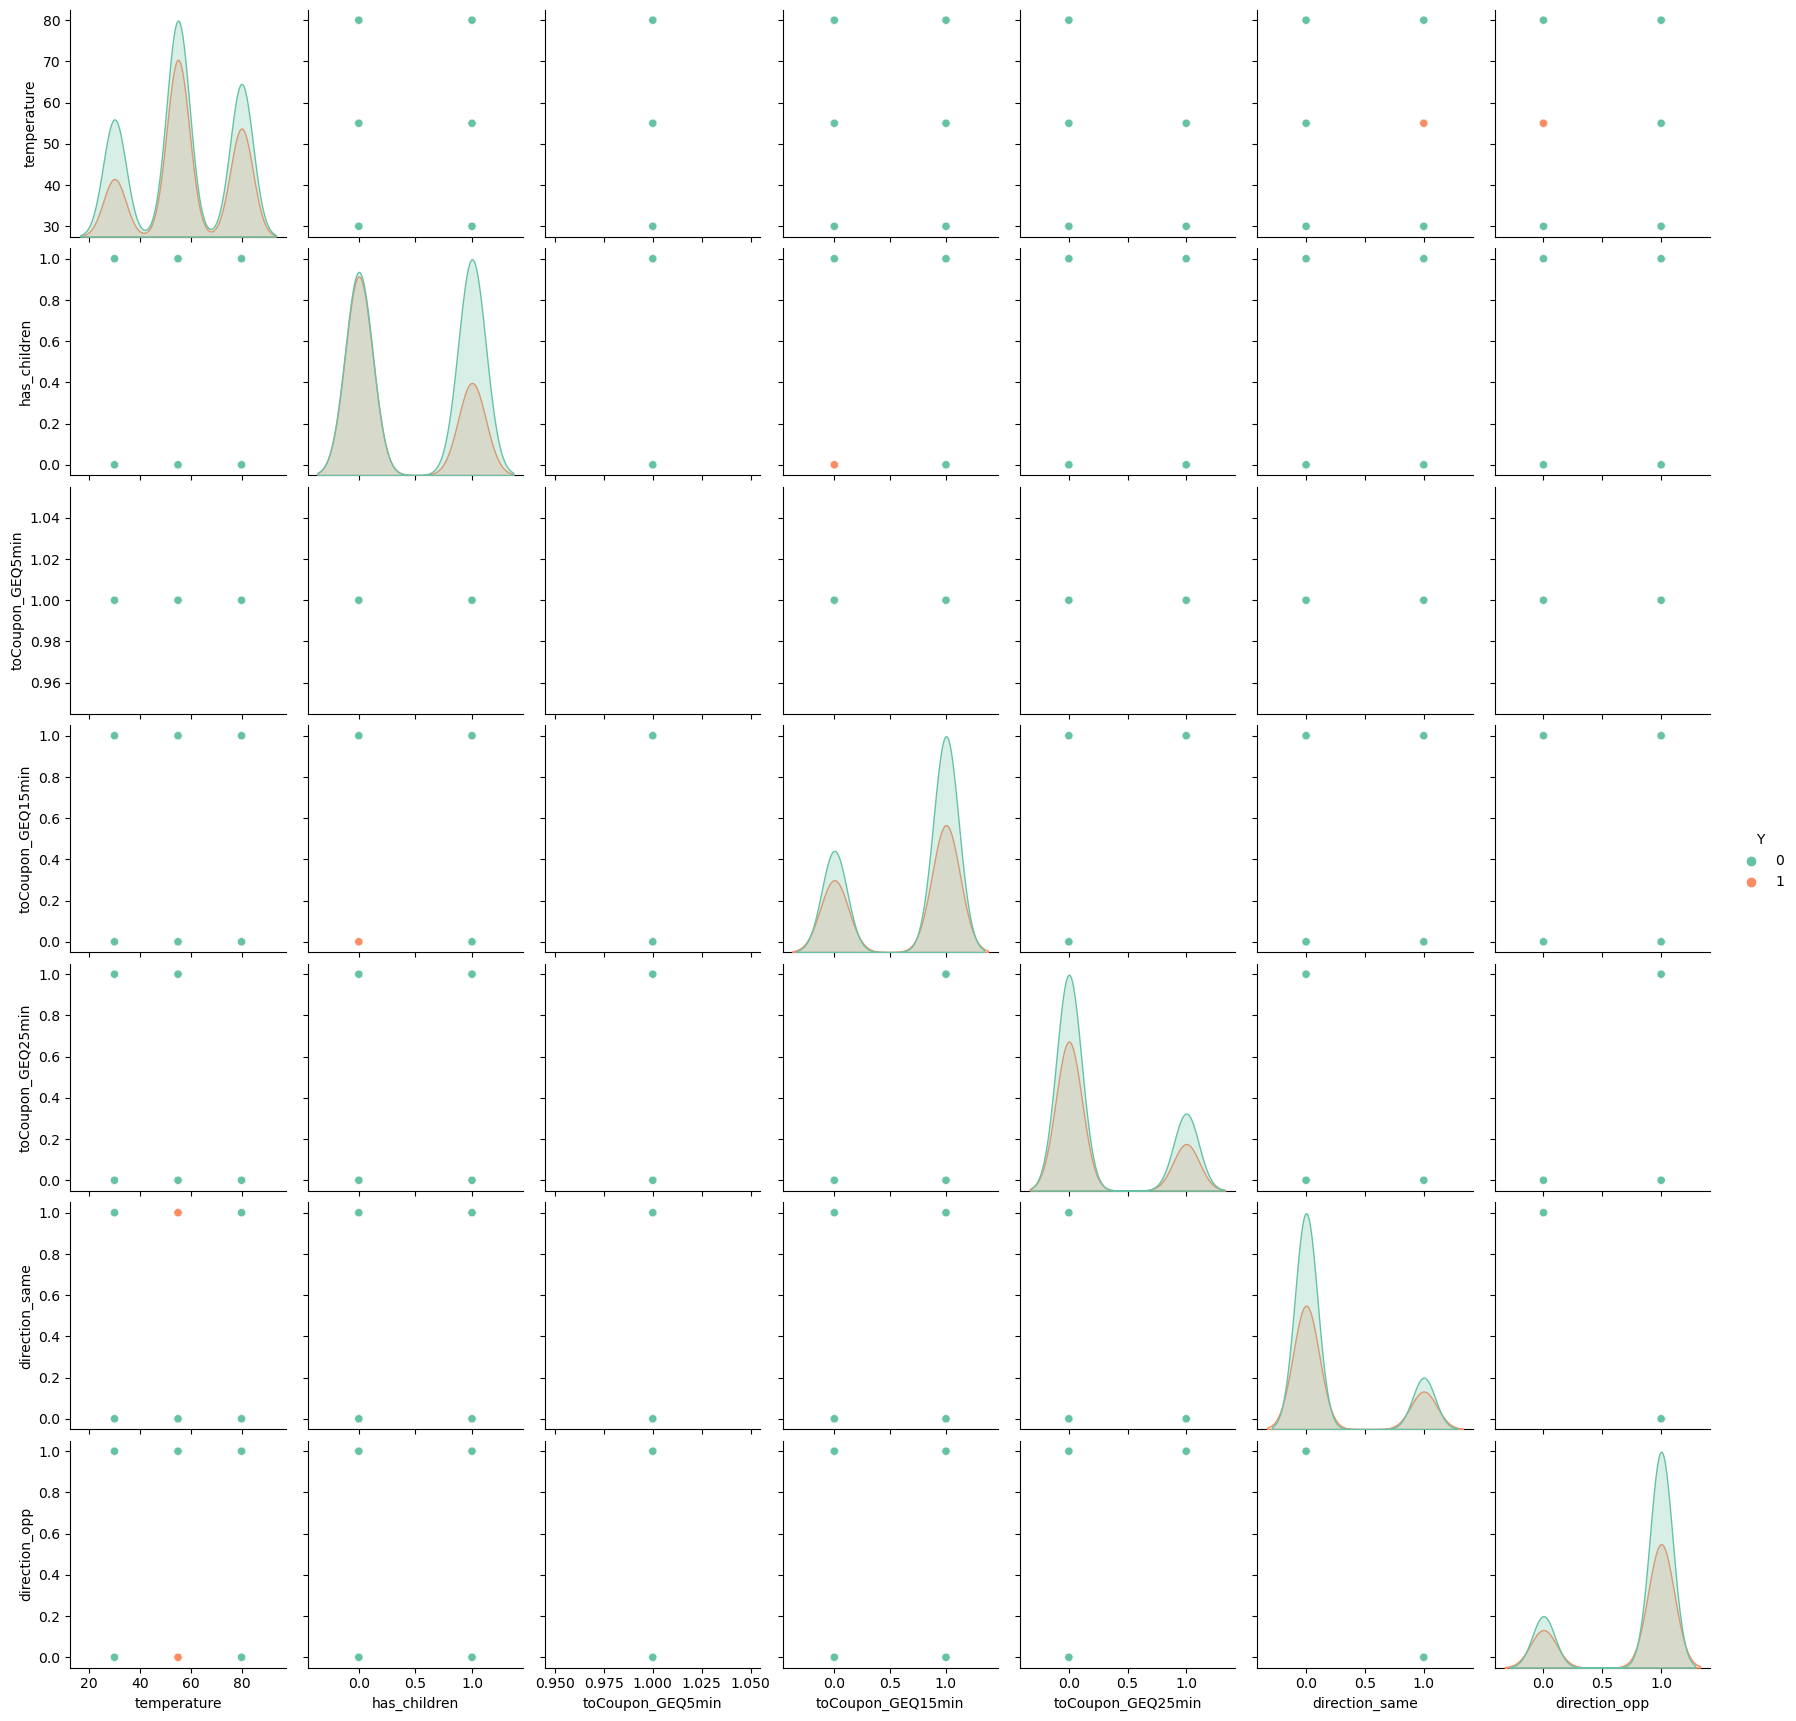

In [251]:
question16 = bardf.query('direction_opp == 1')["Y"].mean()
question17 = bardf.query('direction_opp == 0')["Y"].mean()

print(f"Acceptance rate when bar is in the opposite direction: {question16 * 100:.2f}%")
print(f"Acceptance rate when bar is in in same direction : {question17 * 100:.2f}%")

question18 = bardf.query('has_children == 1')["Y"].mean()
question19 = bardf.query('has_children == 0')["Y"].mean()

print(f"Acceptance rate, has children: {question18 * 100:.2f}%")
print(f"Acceptance rate, no children : {question19 * 100:.2f}%")

sns.pairplot(bardf, hue="Y", palette = "Set2")

### Question 7
Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Answer 7
It appears to me that the biggest factor in accepting a bar coupon is how often one attends a bar in a given month. Age didn't seem to have much of an impact in the over/under mid-20s queries we did.

I can also see from some of the additional analysis I performed that kids have a strong negative effect on accepting the coupon. Both having kids at all and having them in the car strongly decreased likelihood of accepting the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [252]:
print(data['coupon'].value_counts())

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64



## Coupon Investigation: Restaurants(20-50)

I'm going to look at medium expense restaurants and the type of people to accept coupons for that class of venue.

In [266]:
restdf = data[data['coupon'] == "Restaurant(20-50)"]

rest_corr = restdf.corr(numeric_only=True) ##<- not very useful

### Question 1
What is the overall acceptance rate for Restaurant(20-50) coupons?

In [254]:
accept_pct = restdf["Y"].mean()
print(f"Portion accepting the Restraunt(20-50) coupon {accept_pct * 100:.2f}%\n")

Portion accepting the Restraunt(20-50) coupon 44.10%



### Question 2
What characteristics influence a higher acceptance rate?

In [255]:
# Loop over some of the metrics and use groupby to spot groups with high acceptance rate.
def perform_groupby_queries(dataframe, metrics):
    for metric in metrics:
        query = dataframe.groupby(metric)['Y'].mean().sort_values()
        print(f"Acceptance rate, grouped by {metric}: \n{query}\n")


metrics_to_group_by = ['Restaurant20To50', 'passanger', 'destination', 'weather', 'temperature', 'time', 'expiration',
                      'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income']

perform_groupby_queries(restdf, metrics_to_group_by)

# Unhelpful metrics
#'gender', 'toCoupon_GEQ15min','toCoupon_GEQ25min', 'direction_same', 'direction_opp']



Acceptance rate, grouped by Restaurant20To50: 
Restaurant20To50
never    0.297619
less1    0.411444
1~3      0.527415
4~8      0.626374
gt8      0.687500
Name: Y, dtype: float64

Acceptance rate, grouped by passanger: 
passanger
Kid(s)       0.373563
Alone        0.422200
Friend(s)    0.464286
Partner      0.631206
Name: Y, dtype: float64

Acceptance rate, grouped by destination: 
destination
Work               0.398601
Home               0.430322
No Urgent Place    0.502439
Name: Y, dtype: float64

Acceptance rate, grouped by weather: 
weather
Snowy    0.300000
Rainy    0.384615
Sunny    0.464314
Name: Y, dtype: float64

Acceptance rate, grouped by temperature: 
temperature
30    0.336996
55    0.423913
80    0.481786
Name: Y, dtype: float64

Acceptance rate, grouped by time: 
time
10PM    0.328084
7AM     0.398601
6PM     0.502577
2PM     0.538462
10AM    0.616071
Name: Y, dtype: float64

Acceptance rate, grouped by expiration: 
expiration
2h    0.298507
1d    0.520921
Name: Y, dtype

### Answer 2
It's clear that, just like with Bars, frequency of attendance is a big factor in influencing coupon acceptance. Traveling with your partner is a big boost. Also, 10am seemed to be the best time to send a coupon. It's clear that 24h coupons are used much more often than 2h coupons.

Let's visualize attendance frequency with a plot.

In [256]:
groupbydf = restdf.groupby('Restaurant20To50')['Y'].mean().sort_values() * 100
groupbydf.rename({'never' : 'Never', 'less1' : 'Less than 1', '1~3': "1 to 3", '4~8': "4 to 8", 'gt8': 'More than 8'}, inplace = True)
fig = px.bar(groupbydf, labels={'value':'Acceptance Rate (%)', 'Restaurant20To50':'Attendance Frequency (per month)'})
fig.update_layout(title={'text':'Accept Rate for Restaurant (20-50) x Attendance Frequency'}, showlegend=False)
fig.show()

### Question 3
For folks that attend Restraunt(20-50) at least once a month, what additional characteristic influences them to accept?

In [257]:
#perform the same groupby analysis but on a subset of folks who visit these restaurants at least once a month.
rest_1pm_df = restdf.query("Restaurant20To50 in @more_than_1")
accept_pct = rest_1pm_df["Y"].mean()
print(f"Baseline acceptance rate: {accept_pct * 100:.2f}%\n")

perform_groupby_queries(rest_1pm_df, metrics_to_group_by)

Baseline acceptance rate: 55.53%

Acceptance rate, grouped by Restaurant20To50: 
Restaurant20To50
1~3    0.527415
4~8    0.626374
gt8    0.687500
Name: Y, dtype: float64

Acceptance rate, grouped by passanger: 
passanger
Kid(s)       0.412698
Alone        0.546547
Friend(s)    0.568966
Partner      0.769231
Name: Y, dtype: float64

Acceptance rate, grouped by destination: 
destination
Work               0.485507
Home               0.569507
No Urgent Place    0.600000
Name: Y, dtype: float64

Acceptance rate, grouped by weather: 
weather
Snowy    0.413793
Rainy    0.545455
Sunny    0.575117
Name: Y, dtype: float64

Acceptance rate, grouped by temperature: 
temperature
30    0.444444
55    0.575000
80    0.581081
Name: Y, dtype: float64

Acceptance rate, grouped by time: 
time
10PM    0.451852
7AM     0.485507
2PM     0.590164
6PM     0.646154
10AM    0.785714
Name: Y, dtype: float64

Acceptance rate, grouped by expiration: 
expiration
2h    0.379888
1d    0.651376
Name: Y, dtype: float6

### Answer 3
The answer hasn't really changed by narrowing in on folks who frequently visit Restraunt(20-50). Boosting factors remain the same:
* traveling with partner
* 10am is the best time to send the coupon
* 24h coupons are strongly favored

However, 26 year olds emerge as a group significantly more likely to accept than other age groups.

Lets's look at a histogram of passenger:

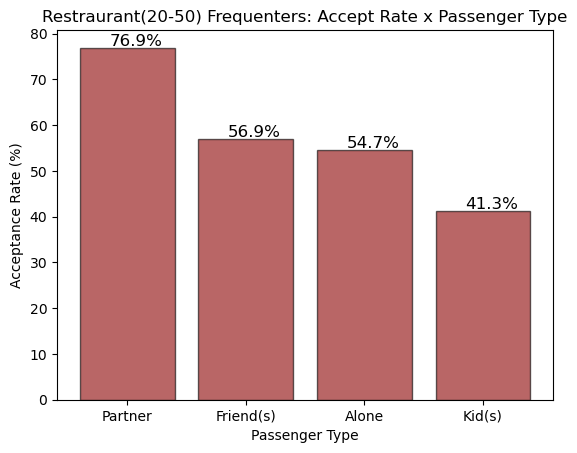

In [264]:
temp = rest_1pm_df.groupby('passanger')['Y'].mean().sort_values(ascending=False) * 100
# print(temp)

ax = plt.bar(x = temp.index , height = temp, color="darkred", alpha=0.6, edgecolor="black")
plt.title('Restraurant(20-50) Frequenters: Accept Rate x Passenger Type')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Passenger Type')

# add percentage value at top of each bar
for i in ax.patches:
    plt.text(x=i.get_x()+0.25,
             y=i.get_height()+0.5,
             s=str(round(i.get_height(),1))+'%',
             fontsize = 12)
plt.show()



### Question 4
For folks who attend Restaurant(20-50) less than once a month, what factors help influence them to accept the coupon?

In [259]:
#perform the same groupby analysis but on a subset of folks who visit these restaurants less than once a month.
rest_under_1pm_df = restdf.query("Restaurant20To50 not in @more_than_1")
accept_pct = rest_under_1pm_df["Y"].mean()
print(f"Baseline acceptance rate: {accept_pct * 100:.2f}%\n")

perform_groupby_queries(rest_under_1pm_df, metrics_to_group_by)

Baseline acceptance rate: 38.24%

Acceptance rate, grouped by Restaurant20To50: 
Restaurant20To50
never    0.297619
less1    0.411444
Name: Y, dtype: float64

Acceptance rate, grouped by passanger: 
passanger
Kid(s)       0.351351
Alone        0.360947
Friend(s)    0.409091
Partner      0.550562
Name: Y, dtype: float64

Acceptance rate, grouped by destination: 
destination
Work               0.357388
Home               0.358140
No Urgent Place    0.449057
Name: Y, dtype: float64

Acceptance rate, grouped by weather: 
weather
Snowy    0.245902
Rainy    0.302326
Sunny    0.406821
Name: Y, dtype: float64

Acceptance rate, grouped by temperature: 
temperature
30    0.284153
55    0.350806
80    0.428829
Name: Y, dtype: float64

Acceptance rate, grouped by time: 
time
10PM    0.260163
7AM     0.357388
6PM     0.430233
2PM     0.512397
10AM    0.514286
Name: Y, dtype: float64

Acceptance rate, grouped by expiration: 
expiration
2h    0.257703
1d    0.453100
Name: Y, dtype: float64

Acceptanc

### Answer 4
Again, the same sorts of factors are important:
* Traveling with their partner.
* 10am is the best time to send, followed closely by 2pm.
* 24h coupons are favored.

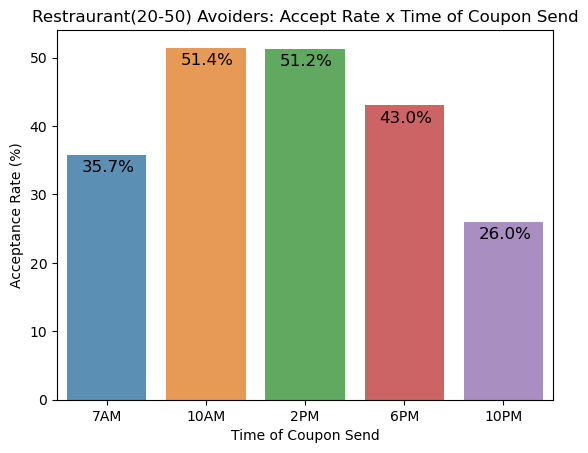

In [265]:
temp = rest_under_1pm_df.groupby('time')['Y'].mean() * 100

#I want the bar graphs to be in chronological order
temp = temp.reindex(['7AM', '10AM', '2PM', '6PM', '10PM'])

ax = sns.barplot(x = temp.index, y=temp, alpha=0.8)
ax.set_xlabel('Time of Coupon Send')
ax.set_ylabel('Acceptance Rate (%)')
plt.title('Restraurant(20-50) Avoiders: Accept Rate x Time of Coupon Send')
# add percentage value at top of each bar
for i in ax.patches:
    plt.text(x=i.get_x()+0.15,
             y=i.get_height()-2.5,
             s=str(round(i.get_height(),1))+'%',
             fontsize = 12)

### Question 5
What impact to the geographic metrics have? Distance to location and it being on the way or not. Let's run the groupby analysis on both groups for these metrics.

In [261]:
geographic_metrics = ['toCoupon_GEQ15min','toCoupon_GEQ25min', 'direction_same', 'direction_opp']

#geographic metrics for those visiting at least once a month
perform_groupby_queries(rest_1pm_df, directional_metrics)

Acceptance rate, grouped by toCoupon_GEQ15min: 
toCoupon_GEQ15min
1    0.547468
0    0.568421
Name: Y, dtype: float64

Acceptance rate, grouped by toCoupon_GEQ25min: 
toCoupon_GEQ25min
1    0.527778
0    0.557447
Name: Y, dtype: float64

Acceptance rate, grouped by direction_same: 
direction_same
0    0.550481
1    0.577778
Name: Y, dtype: float64

Acceptance rate, grouped by direction_opp: 
direction_opp
1    0.550481
0    0.577778
Name: Y, dtype: float64



In [262]:
#geographic metrics for those visiting less than once a month
perform_groupby_queries(rest_under_1pm_df, directional_metrics)

Acceptance rate, grouped by toCoupon_GEQ15min: 
toCoupon_GEQ15min
1    0.379968
0    0.386555
Name: Y, dtype: float64

Acceptance rate, grouped by toCoupon_GEQ25min: 
toCoupon_GEQ25min
1    0.375000
0    0.383002
Name: Y, dtype: float64

Acceptance rate, grouped by direction_same: 
direction_same
0    0.378510
1    0.401198
Name: Y, dtype: float64

Acceptance rate, grouped by direction_opp: 
direction_opp
1    0.378510
0    0.401198
Name: Y, dtype: float64



### Answer 5
Geographic metrics don't appear to have a strong influence on acceptance rate for either group. This is unfortuante because one of the core ideas of this whole project is delivering coupons to drivers while they nearby a restaurant. If there were a boost for acceptance of nearby restaurants that would make a strong argument that this project needs to track driver position and deliver coupons for nearby restaurants but so far the metrics don't seem to support that use case.

In [263]:
# Pair plot didn't turn up anything interesting.
# sns.pairplot(restdf, hue='Y')

### Next Steps and Recommendations

#### Frequency
To make good predictions about who will accept coupons, we need to gather some data about how frequently each person visit venue type. Frequency of visit appears to be the most predictive characteristic of who will accept a coupon.

#### Traveling Partner (if any)
Being able to classify who is in the car with the driver is also important. If kids are present that reduces the chance of accepting. If the driver's parter is present, it increases changes. Perhaps there is a way to encourage partners to declare they are together, then we could monitor both their locations and determine if they are in a car together in order to boost acceptance rate.

#### Send Time
Time of coupon send appears to matter as well. Coupons sent in the early morning or late at night are not accepted nearly as much as those send in the middle of the day. I would recommend that if we don't have data about when someone wants to receive a coupon, we favor mid-day, especially 10AM seems to be the strongest timeslot.
I don't recommend changing all send to the 10AM slot. We could do analysis to see what time slot each individaul user is mostly likely to accept coupons in and optimize that on a per-user basis.

#### Geographic Data Not Very Predictive
As discussed in a previous answer, it's disappointing that we don't see a stronger signal from geographic metrics like distance to venue or opposite direction.